# Student Score analytics

## Data Load

Load in the data and check that is loads in correctly

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from DataLoading import load_data
from FeatureEngineering import one_hot_encode_feature
import sklearn
import numpy as np

In [2]:
student_df = load_data()

In [3]:
student_df.shape

(1000, 8)

Data shape matches the shape on the dataset specs

In [4]:
student_df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Columns match the columns on the specs

## EDA (Exploratory Data Analysis)

### Missing Data

In [5]:
student_df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Well that's a welcome change. No missing data

### Basic feel

In [6]:
student_df.head(8)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


### Variable analysis

#### gender

##### Value types

In [7]:
type(student_df.gender[0])

str

String values, how many?

##### distribution

In [8]:
student_df.gender.value_counts()

gender
female    518
male      482
Name: count, dtype: int64

two types, reasonably evenly split as well

#### race_ethnicity

This is an ethical landmine. Do the smart thing and delete this feature completely

In [9]:
all_cols = student_df.columns.to_list()
all_cols.remove('race_ethnicity')
student_df = student_df[all_cols]

#### parental_level_of_education

In [10]:
all_cols[1]

'parental_level_of_education'

In [11]:
feature_of_interest = all_cols[1]
feature_of_interest

'parental_level_of_education'

In [12]:
VC = student_df[feature_of_interest].value_counts()
VC

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [13]:
list(VC.index)

['some college',
 "associate's degree",
 'high school',
 'some high school',
 "bachelor's degree",
 "master's degree"]

Text(0.5, 1.0, 'distribution of educational level')

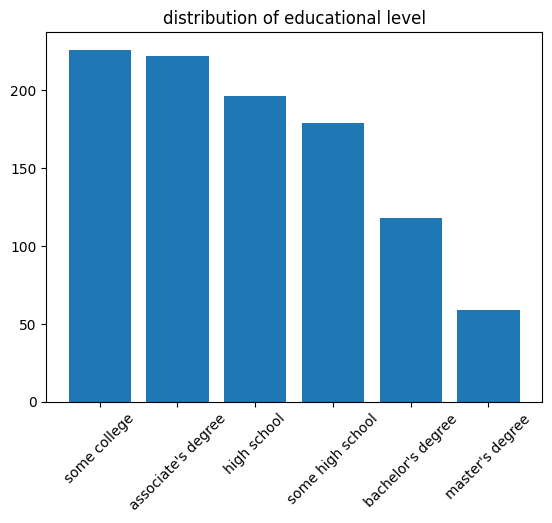

In [14]:
_ = plt.bar(range(6),student_df[feature_of_interest].value_counts())
_ = plt.xticks(range(6),list(VC.index), rotation=45)
plt.title ('distribution of educational level')

Doesn't look like the ordering is correct, should reorder in ascending level of education

In [15]:
education_dict= {'some high school': 0,
                 'high school': 1,
                 "associate's degree": 2,
                 'some college': 3,
                 "bachelor's degree": 4,
                 "master's degree": 5}
                 

Ugh, painful use of single quotation marks as apostrophes in the data

In [16]:
from FeatureEngineering import ordinal_encode_feature

In [17]:
student_df = ordinal_encode_feature(student_df, feature_of_interest, education_dict)

In [18]:
student_df.head(5)

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,4,standard,none,72,72,74
1,female,3,standard,completed,69,90,88
2,female,5,standard,none,90,95,93
3,male,2,free/reduced,none,47,57,44
4,male,3,standard,none,76,78,75


In [19]:
reverse_edu_dict = {val: key for key, val in education_dict.items()}

In [20]:
student_df[feature_of_interest]

0      4
1      3
2      5
3      2
4      3
      ..
995    5
996    1
997    1
998    3
999    3
Name: parental_level_of_education, Length: 1000, dtype: int64

Text(0.5, 1.0, 'distribution of educational level')

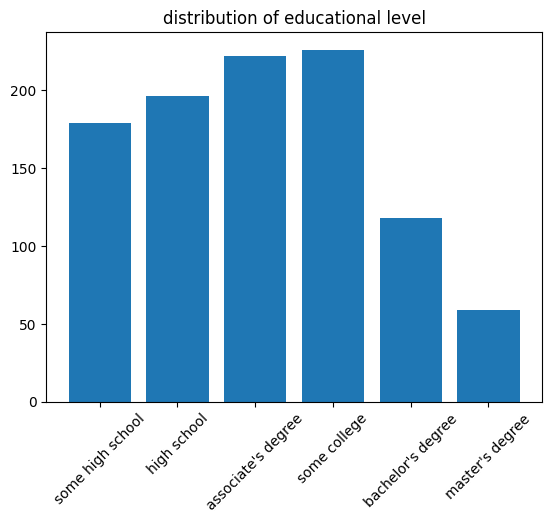

In [21]:
VCi = student_df[feature_of_interest].value_counts().sort_index()
XTix = [reverse_edu_dict[key] for key in VCi.index]
_ = plt.bar(range(6),VCi.values)
_ = plt.xticks(range(6),XTix, rotation=45)
plt.title ('distribution of educational level')

ok, that looks more understandable. Surprising, but interesting

#### lunch

In [22]:
feature_of_interest = student_df.columns[2]
feature_of_interest

'lunch'

In [23]:
student_df[feature_of_interest].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Not exactly balanced, but sizeable enough to work with. Any modelling will need to account for the imbalance

#### Test preperation course

In [24]:
feature_of_interest = student_df.columns[3]
feature_of_interest

'test_preparation_course'

In [25]:
student_df[feature_of_interest].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

let's one-hot encode this one

In [28]:
student_df = one_hot_encode_feature(student_df, feature_of_interest)
student_df.head()

,gender,parental_level_of_education,lunch,math_score,reading_score,writing_score,test_preparation_course_completed,test_preparation_course_none
0,female,4,standard,72,72,74,False,True
1,female,3,standard,69,90,88,True,False
2,female,5,standard,90,95,93,False,True
3,male,2,free/reduced,47,57,44,False,True
4,male,3,standard,76,78,75,False,True


#### Math Score

In [30]:
feature_of_interest = student_df.columns[3]
feature_of_interest

'math_score'

In [31]:
student_df[feature_of_interest].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

Text(0.5, 1.0, 'Math Score distribution')

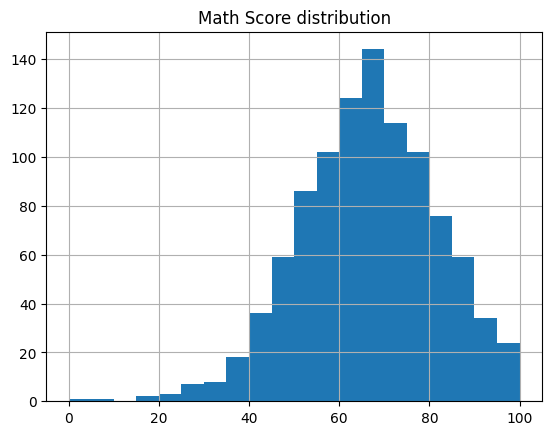

In [32]:
student_df[feature_of_interest].hist(bins=20)
plt.title('Math Score distribution')

Nothing worrying about this distribution

#### Reading Score

In [33]:
feature_of_interest = student_df.columns[4]
feature_of_interest

'reading_score'

In [34]:
student_df[feature_of_interest].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

Text(0.5, 1.0, 'Reading Score distribution')

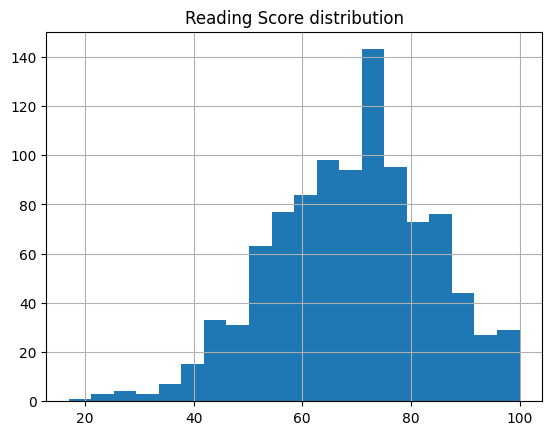

In [35]:
student_df[feature_of_interest].hist(bins=20)
plt.title ('Reading Score distribution')

Interesting. longer left-hand tail on reading, honestly quite surprising

#### Writing Score

In [36]:
feature_of_interest = student_df.columns[5]
feature_of_interest

'writing_score'

In [37]:
student_df[feature_of_interest].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

Text(0.5, 1.0, 'Writing Score')

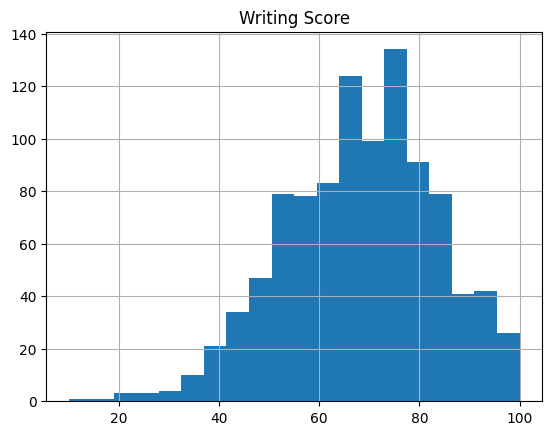

In [38]:
student_df[feature_of_interest].hist(bins=20)
plt.title('Writing Score')

Similar distribution to reading, as would be expected. Also showing the same long left-hand tail

No outliers in any of the numerical scores, no data cleaning to be done.

## Feature Engineering

We are looking to predict each of the three scores to see if there's any useful predictive power. 

In [39]:
student_df.head()

,gender,parental_level_of_education,lunch,math_score,reading_score,writing_score,test_preparation_course_completed,test_preparation_course_none
0,female,4,standard,72,72,74,False,True
1,female,3,standard,69,90,88,True,False
2,female,5,standard,90,95,93,False,True
3,male,2,free/reduced,47,57,44,False,True
4,male,3,standard,76,78,75,False,True


### one-hot encode gender

Gender has no ordinal properties, and so should be one-hot-encoded

In [40]:
from FeatureEngineering import one_hot_encode_feature

In [41]:
df_gend = one_hot_encode_feature(student_df, 'gender')
df_gend.head()

,parental_level_of_education,lunch,math_score,reading_score,writing_score,test_preparation_course_completed,test_preparation_course_none,gender_female,gender_male
0,4,standard,72,72,74,False,True,True,False
1,3,standard,69,90,88,True,False,True,False
2,5,standard,90,95,93,False,True,True,False
3,2,free/reduced,47,57,44,False,True,False,True
4,3,standard,76,78,75,False,True,False,True


### Ordinal encode lunch

There is clearly a 'better' version of this, so encode in an ordinal fashion, similar to how we've managed<br>
the parental level of education

In [42]:
lunch_values = df_gend.lunch.unique()
lunch_values

array(['standard', 'free/reduced'], dtype=object)

In [43]:
lunch_dict = {lunch_values[1]: 0,
              lunch_values[0]: 1}
lunch_dict

{'free/reduced': 0, 'standard': 1}

In [44]:
df_lunch = ordinal_encode_feature(df_gend, 'lunch', lunch_dict)
df_lunch.head()

,parental_level_of_education,lunch,math_score,reading_score,writing_score,test_preparation_course_completed,test_preparation_course_none,gender_female,gender_male
0,4,1,72,72,74,False,True,True,False
1,3,1,69,90,88,True,False,True,False
2,5,1,90,95,93,False,True,True,False
3,2,0,47,57,44,False,True,False,True
4,3,1,76,78,75,False,True,False,True


### Reorder to keep the target variable(s) on the right

In [45]:
from FeatureEngineering import move_features_to_end

In [46]:
target_features = ['math_score', 'reading_score', 'writing_score']
df_reshaped = move_features_to_end(df_lunch, target_features)
df_reshaped.head()

,parental_level_of_education,lunch,test_preparation_course_completed,test_preparation_course_none,gender_female,gender_male,math_score,reading_score,writing_score
0,4,1,False,True,True,False,72,72,74
1,3,1,True,False,True,False,69,90,88
2,5,1,False,True,True,False,90,95,93
3,2,0,False,True,False,True,47,57,44
4,3,1,False,True,False,True,76,78,75


Excellent, time for the data processing

## Data Processing

### extract numpy array

In [47]:
from DataProcessing import extract_data

In [48]:
FA = extract_data(df_reshaped)

### scale data

Data needs to be scaled, lets do it

In [49]:
from DataProcessing import scale_data, split_data, create_input_target

In [50]:
scaled_data, scaler = scale_data(FA)

### Separate into training, validation and testing

In [51]:
train_data, val_data, test_data = split_data(scaled_data)

In [52]:
for dat in (train_data, test_data, val_data):
    print(dat.shape)

(700, 9)
(150, 9)
(150, 9)


### create training and target matrices / vectors

default target is the last column, so this is training for writing score

In [53]:
train_x, train_y = create_input_target(train_data)
val_x, val_y = create_input_target(val_data)
test_x, test_y = create_input_target(test_data)

## Model!

### Build a model

In [55]:
from Modelling import create_feedforward_network

In [62]:
NN = create_feedforward_network(train_x.shape[1], width = 10, depth = 5)

In [63]:
NN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 521 (2.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train network

In [64]:
history = NN.fit(x=train_x, y=train_y, validation_data=(val_x, val_y), epochs = 200)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2981 - val_loss: 0.1003
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0896 - val_loss: 0.0459
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0363 - val_loss: 0.0339
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304 - val_loss: 0.0303
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - val_loss: 0.0283
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0243 - val_loss: 0.0275
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220 - val_loss: 0.0263
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0205 - val_loss: 0.0259
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 - val_loss: 0.0255
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - val_loss: 0.0254
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - val_loss: 0.0248
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

In [65]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

### Evaluation

Text(0.5, 0, 'epoch')

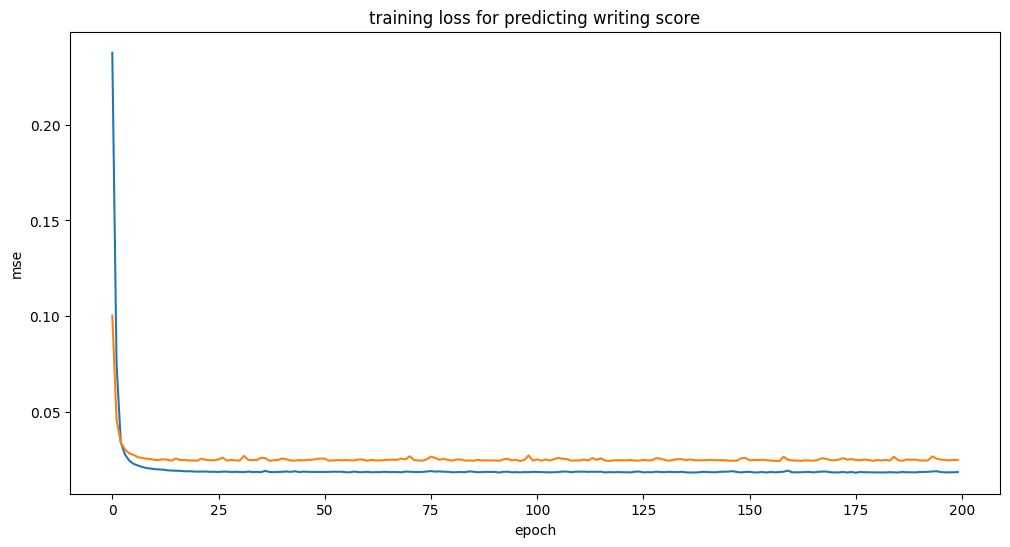

In [66]:
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(history.history['loss'], label = 'training data')
plt.plot(history.history['val_loss'], label = 'validation data')
plt.title ('training loss for predicting writing score')
plt.ylabel('mse')
plt.xlabel('epoch')

Good news is that we're not overfitting. Let's see if we can do better...

In [69]:
NN_bigger = create_feedforward_network(input_dim=train_x.shape[1], width = 10, depth = 10)

In [70]:
history = NN_bigger.fit(x=train_x, y=train_y, validation_data=(val_x, val_y), epochs = 200)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.4338 - val_loss: 0.3539
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3612 - val_loss: 0.2696
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2561 - val_loss: 0.1765
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1478 - val_loss: 0.0541
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0367 - val_loss: 0.0287
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213 - val_loss: 0.0273
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0196 - val_loss: 0.0254
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194 - val_loss: 0.0252
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - val_loss: 0.0251
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 - val_loss: 0.0255
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0190 - val_loss: 0.0252
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

Text(0.5, 0, 'epoch')

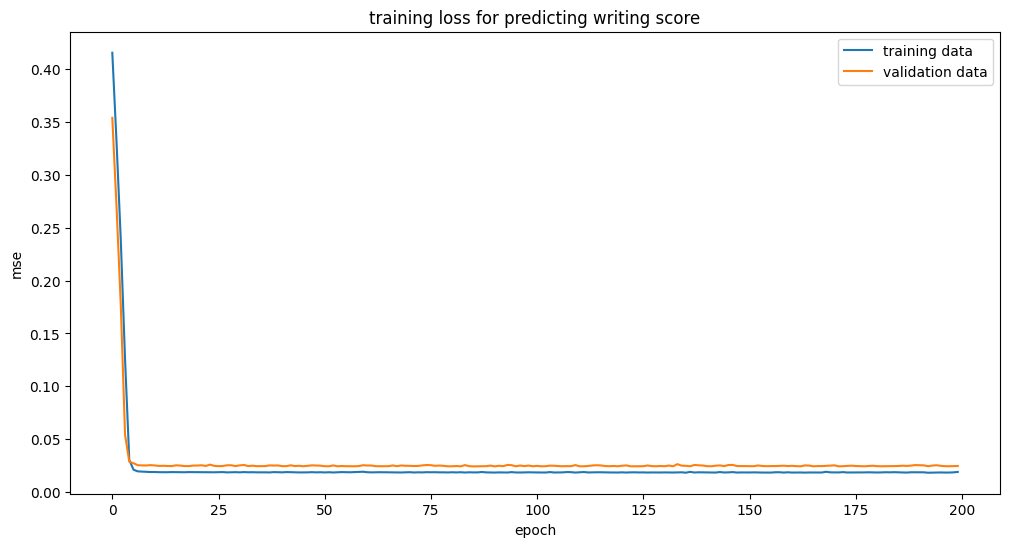

In [71]:
plt.rcParams['figure.figsize'] = (12,6)
plt.plot(history.history['loss'], label = 'training data')
plt.plot(history.history['val_loss'], label = 'validation data')
plt.title ('training loss for predicting writing score')
plt.legend()
plt.ylabel('mse')
plt.xlabel('epoch')

No appreciable difference, so lets look at the results

In [72]:
test_predictions = NN.predict(val_x)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


Text(0.5, 1.0, 'Simple Neural Network')

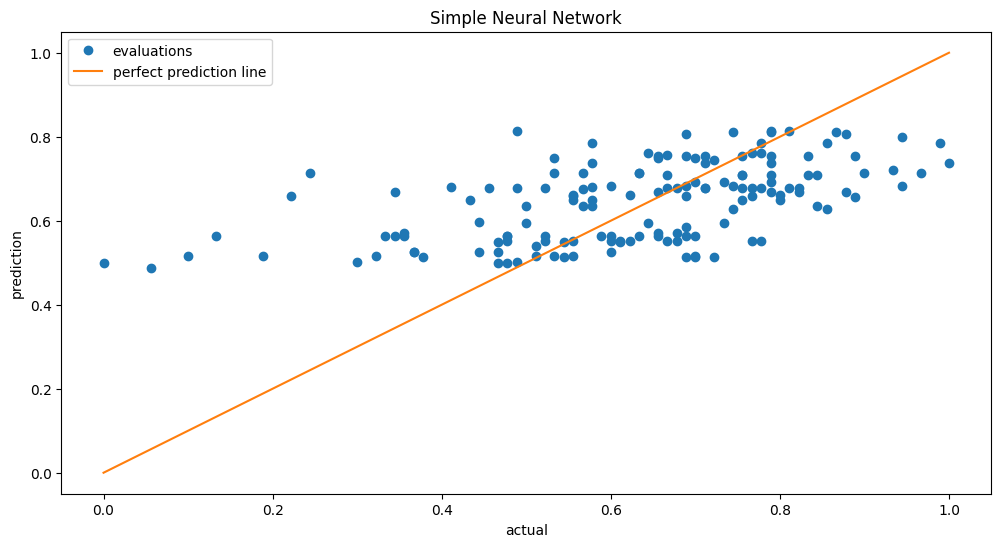

In [74]:
plt.plot(val_y, test_predictions, 'o', label = 'evaluations')
line = [val_y.min(), val_y.max()]
plt.plot(line, line, label = 'perfect prediction line')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Simple Neural Network')

This is telling us we have a VERY poor predictor. Time to re-evaluate our feature engineering and assumptions

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
Tree = RandomForestRegressor()

In [77]:
Tree.fit(train_x, train_y)

RandomForestRegressor()

In [78]:
tree_predict = Tree.predict(val_x)

Text(0.5, 1.0, 'Random Forest')

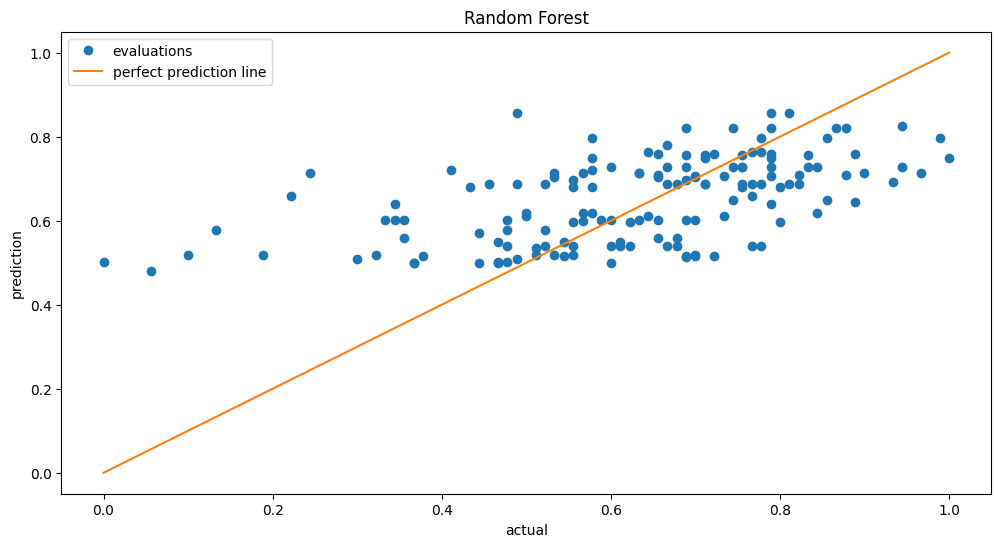

In [79]:
plt.plot(val_y, tree_predict, 'o', label = 'evaluations')
line = [val_y.min(), val_y.max()]
plt.plot(line, line, label = 'perfect prediction line')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Random Forest')

Evidence that our problem is not the modelling method, but the data representation / assumptions

Any better for maths?

In [80]:
Tree.score(train_x, train_y)

0.3428001165594442

## Model maths

### Build a model

In [ ]:
train_data, val_data, test_data = split_data(scaled_data, )

In [69]:
maths_Tree = RandomForestRegressor()

### Train

In [82]:
df_reshaped.columns

Index(['parental_level_of_education', 'lunch',
       'test_preparation_course_completed', 'test_preparation_course_none',
       'gender_female', 'gender_male', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [83]:
tgt = -3
train_x, train_y = create_input_target(train_data, tgt)
val_x, val_y = create_input_target(val_data, tgt)
test_x, test_y = create_input_target(test_data, tgt)

In [84]:
Tree=RandomForestRegressor()
Tree.fit(train_x, train_y)

RandomForestRegressor()

### Evaluate

In [85]:
Tree.score(val_x, val_y)

0.20544986877669769

In [87]:
tree_predict = Tree.predict(val_x)

Text(0.5, 1.0, 'Random Forest')

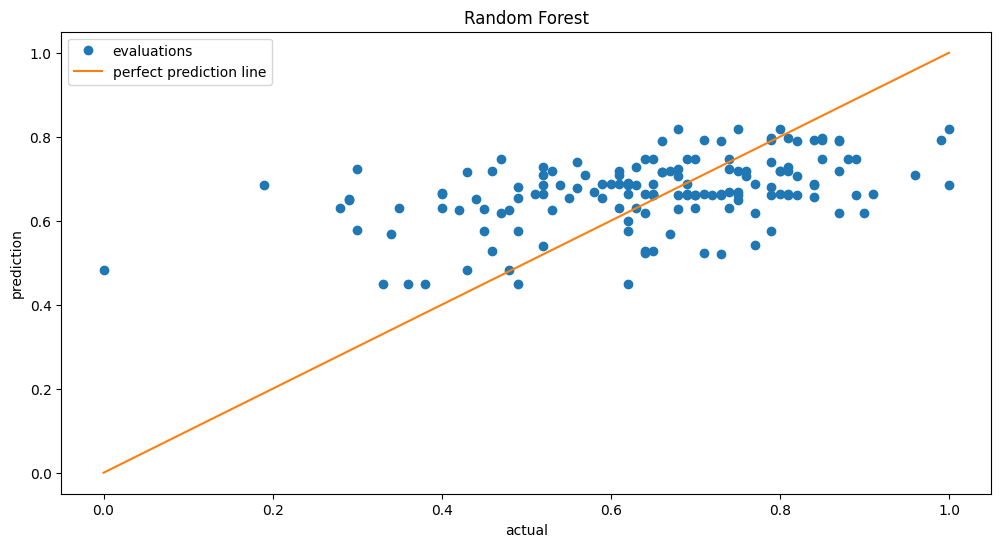

In [88]:
plt.plot(val_y, tree_predict, 'o', label = 'evaluations')
line = [val_y.min(), val_y.max()]
plt.plot(line, line, label = 'perfect prediction line')
plt.legend()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.title('Random Forest')

Not a particularly great output. Makes some challenging notes about the relationships of the features